## Loading aligned center patches from 3D volumes

In [1]:
import numpy as np
import torch
import torch.utils.data

from connectomics.data.utils import readh5, syn_sem2inst, seg2polarity

import sys
sys.path.append("../")
from twostream.dataset import VolumeDatasetCenterPatch
from twostream.utils import collate_fn_patch

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='viridis', title='Test Title', interpolation=None):  
    num_imgs = image.shape[-3] # c (optional), z, y, x
    fig = plt.figure(figsize=(20., 3.))
    fig.suptitle(title, fontsize=14)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_imgs),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    image_list = np.split(image, num_imgs, -3)
    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        # Iterating over the grid returns the Axes.
        if im.ndim == 3:
            im = im.transpose(1,2,0)
        ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

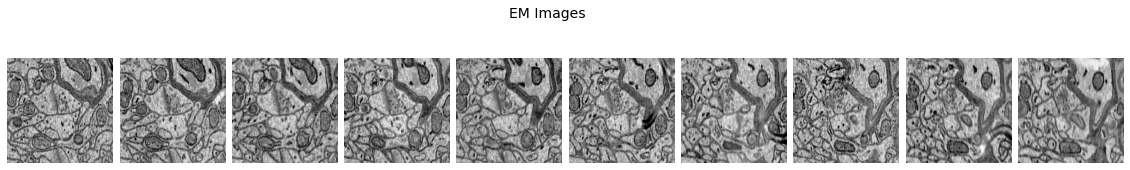

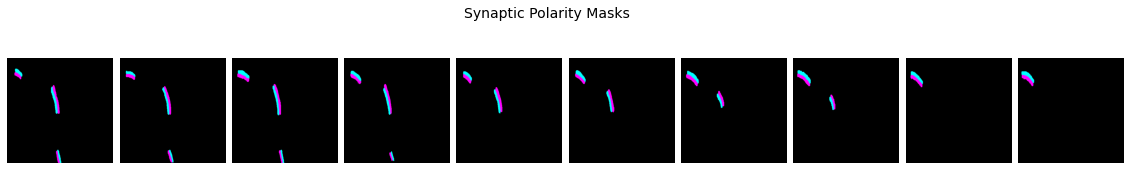

In [3]:
# load volumes
img = readh5("../../../datasets/synapse/img.h5")
syn = readh5("../../../datasets/synapse/syn.h5")
syn = syn_sem2inst(syn)

polarity = seg2polarity(syn)
show(img[50:60,:400,:400], title="EM Images", cmap='gray')
show(polarity[:,50:60,:400,:400], title="Synaptic Polarity Masks")

In [4]:
# construct the center-patch volume dataset
ds = VolumeDatasetCenterPatch([syn], [img], label_type='syn', sample_size=128, mode='train')
loader = torch.utils.data.DataLoader(ds, batch_size=10, shuffle=False, pin_memory=False,
                                     collate_fn=collate_fn_patch, num_workers=1)

Total number of samples to be generated:  121


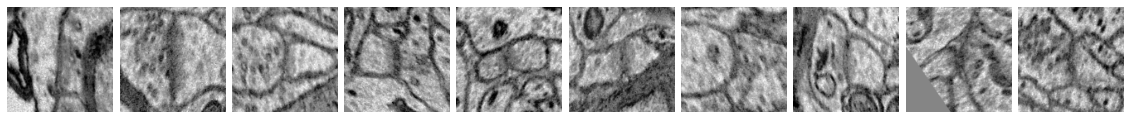

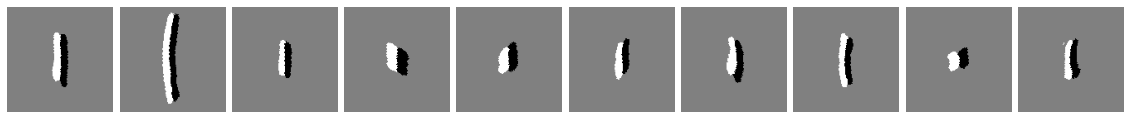

In [7]:
for i, sample in enumerate(loader):
    img, seg = sample.img, sample.seg    
    show(img.numpy().transpose(1,0,2,3), title=None, cmap='gray')
    show(seg.numpy().transpose(1,0,2,3), title=None, cmap='gray')        
    break